# Imorting Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Advertising.csv', index_col = 0)

In [3]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


# EDA

In [5]:
import seaborn as sns

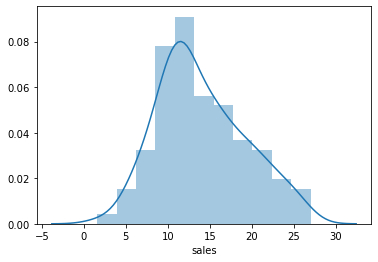

In [6]:
sns.distplot(df['sales'])

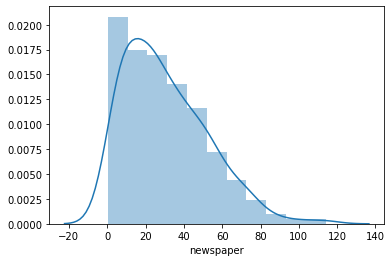

In [7]:
sns.distplot(df['newspaper'])

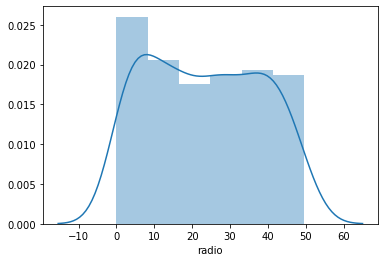

In [8]:
sns.distplot(df['radio'])

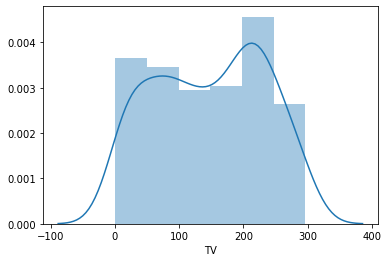

In [9]:
sns.distplot(df['TV'])

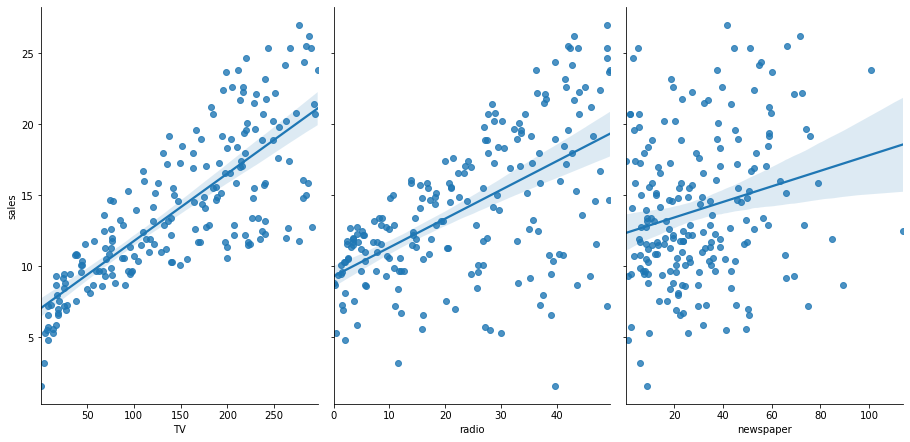

In [10]:
sns.pairplot(df, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', height=6, aspect=0.7, kind='reg')

In [11]:
corr = df.corr()
corr

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


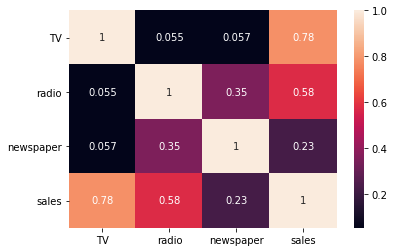

In [12]:
heatmap = sns.heatmap( df.corr(), annot=True )
heatmap

# Creating Linear Regression Model

In [13]:
X = df[['TV', 'radio', 'newspaper']]
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [14]:
# checking type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [15]:
y = df['sales']
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [16]:
# checking type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#  Interpreting Model Coefficients

In [22]:
# Intercept and Coefficients
print(model.intercept_)
print(model.coef_)

2.907947020816433
[0.0468431  0.17854434 0.00258619]


# Making Prediction

In [23]:
# make predictions on the testing set
y_pred = model.predict(X_test)

In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
mean_squared_error(y_test, y_pred)

1.9918855518287906

In [26]:
from sklearn.metrics import r2_score

In [27]:
r2_score(y_test, y_pred)

0.8927605914615384